In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy
import os
import nept

In [7]:
thisdir = os.getcwd()
data_filepath = os.path.join(thisdir, "cache", "data")
output_filepath = os.path.join(thisdir, "plots", "experience")
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)

In [8]:
rat_id = "R187"
date = "2019-08-09"
data_filepath = os.path.join(data_filepath, rat_id, rat_id+"_"+date+"_recording")
import info.r187_exp01 as info

In [9]:
data_filepath

'E:\\code\\emi_experience\\cache\\data\\R187\\R187_2019-08-09_recording'

In [10]:
def get_exp_trials(events):
    starts = np.sort(np.append(events["trial_start"], [info.task_times["run1"].start, info.task_times["run2"].start]))
    stops = events["trial_end"]
    return nept.Epoch(starts, stops)

In [11]:
event_filename = date+"_Events.nev"
events = nept.load_events(os.path.join(data_filepath, event_filename), info.event_labels)
trials = get_exp_trials(events)
print("Mean:", np.mean(trials.durations), "(s) +/- sem:", scipy.stats.sem(trials.durations))

Mean: 40.72289674999997 (s) +/- sem: 1.664832769377211


In [12]:
lfp = nept.load_lfp(os.path.join(data_filepath, info.lfp_swr_filename))

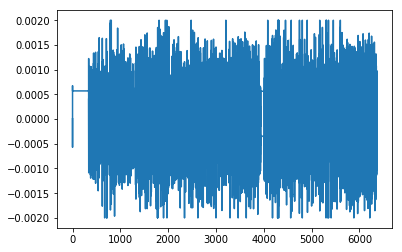

In [13]:
plt.plot(lfp.time, lfp.data)
plt.show()

In [14]:
position_filename = date+"_VT1.nvt"
position = nept.load_position(os.path.join(data_filepath, position_filename), pxl_to_cm=[info.pxl_to_cm["x"], info.pxl_to_cm["y"]])

In [19]:
thresh=(140.0, 250.0)

In [22]:
# Filtering signal with butterworth fitler
filtered_butter = nept.butter_bandpass(lfp.data, thresh, info.fs)

# Get LFP power (using Hilbert) and z-score the power
# Zero padding to nearest regular number to speed up fast fourier transforms (FFT) computed in the hilbert function.
# Regular numbers are composites of the prime factors 2, 3, and 5.
hilbert_n = nept.next_regular(lfp.n_samples)
power = np.abs(scipy.signal.hilbert(filtered_butter, N=hilbert_n))

# removing the zero padding now that the power is computed
power_lfp = nept.AnalogSignal(power[:lfp.n_samples], lfp.time)

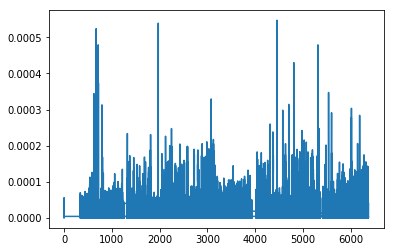

In [23]:
plt.plot(power_lfp.time, power_lfp.data)
plt.show()

In [24]:
fs = 2000
time = np.arange(0, 0.5, 1./fs)
freq = np.ones(len(time))*100
freq[int(len(time)*0.4):int(len(time)*0.6)] = 180
freq[int(len(time)*0.7):int(len(time)*0.9)] = 260
data = np.sin(2.*np.pi*freq*time)

lfp = nept.LocalFieldPotential(data, time)

swrs = nept.detect_swr_hilbert(lfp, fs=2000, thresh=(140.0, 250.0), z_thresh=0.4,
                               merge_thresh=0.02, min_length=0.01)

In [25]:
swrs.starts

array([0.1995])

In [26]:
swrs.stops

array([0.301])

[0.1995] [0.301]


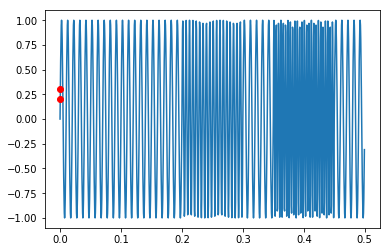

In [47]:
fs = 2000
time = np.arange(0, 0.5, 1./fs)
freq = np.ones(len(time))*100
freq[int(len(time)*0.4):int(len(time)*0.6)] = 180
freq[int(len(time)*0.7):int(len(time)*0.9)] = 260
data = np.sin(2.*np.pi*freq*time)

lfp = nept.LocalFieldPotential(data, time)

swrs = nept.detect_swr_hilbert(lfp, fs=2000, thresh=(140.0, 250.0), z_thresh=0.4,
                               merge_thresh=0.02, min_length=0.01)

print(swrs.starts, swrs.stops)

plt.plot(lfp.time, lfp.data)
plt.plot(lfp.time[nept.find_nearest_indices(lfp.time, swrs.starts)[0]], "ro")
plt.plot(lfp.time[nept.find_nearest_indices(lfp.time, swrs.stops)[0]], "ro")
plt.show()

In [42]:
nept.find_nearest_indices(lfp.time, swrs.stops)

array([602])

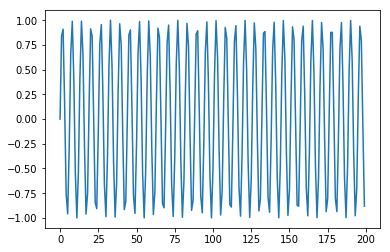

In [62]:
fs = 1
time = np.arange(0, 200, fs)
data = np.sin(time)

lfp = nept.LocalFieldPotential(data, time)

plt.plot(lfp.time, lfp.data)
plt.show()

In [64]:
swrs = nept.detect_swr_hilbert(lfp, fs=fs, thresh=(14.0, 25.0), z_thresh=0.4, merge_thresh=0., min_length=0.)

print(swrs.starts, swrs.stops)

ValueError: Digital filter critical frequencies must be 0 < Wn < 1

In [69]:
nept.butter_bandpass(lfp.data, thresh=(0,1), fs=1, order=4)

ValueError: Digital filter critical frequencies must be 0 < Wn < 1